In [46]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###

# Plot settings
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standard_scaler = StandardScaler()
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')
sys.path.append('/home/ak/Documents/PaperCode/stylised_facts')
import stylised_facts_data_utilities as sfd_utils
import lob_for_futures as lobfut
%matplotlib inline
import os

from scipy.stats import norm, ttest_ind

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
import logging


def logger(name, level=logging.INFO):
    tmp_logger = logging.getLogger(name)
    if not tmp_logger.handlers:
        formatter = logging.Formatter('%(asctime)s %(name)s  %(levelname)s %(message)s')
        handler = logging.StreamHandler()
        handler.setFormatter(formatter)

        tmp_logger.setLevel(level)
        tmp_logger.addHandler(handler)
    return tmp_logger

In [3]:
laptop_OS_folder = '/media/ak/OS/Data/FuturesDataSemiProcessed'
LaCie_ProcessedData = '/media/ak/LaCie/ProcessedSampledData/'
#returns_data = '/media/ak/T7/August11th2022Experiments/Returns/'
t7 = '/media/ak/T7/'
june_ext = os.path.join(t7, 'June4th2022Experiments')
returns_data = [f for f in os.listdir(june_ext) if '_returns' in f]

In [4]:
symbols  = os.listdir(laptop_OS_folder)
symbol_test_folder  = os.path.join(laptop_OS_folder, symbols[0])
rx_folder = os.path.join(laptop_OS_folder, 'RX1')
files = os.listdir(rx_folder)


In [6]:
bar_keys = ['tick', 'volume', 'calendar', 'dollar']
files_idx = 5
date_idx = files[files_idx].split(".")[0]
idx_file = os.path.join(rx_folder, files[files_idx])
tick_df = pd.read_pickle(idx_file)[date_idx]['tick']
volume_df = pd.read_pickle(idx_file)[date_idx]['volume']
calendar_df = pd.read_pickle(idx_file)[date_idx]['calendar']
dollar_df = pd.read_pickle(idx_file)[date_idx]['dollar']




In [11]:
tick_df_micro = lobfut.apply_micro_structure_features(tick_df)
vol_class = lobfut.volatilityEstimation(tick_df)

Applying micro-structure features


In [8]:
GK_vol = list(vol_class.garmanKlass(5))

In [36]:
tick_experiment_df = pd.DataFrame()

In [37]:
tick_experiment_df['test']=tick_df_micro[['total_traded_volume_open',
       'total_traded_volume_high', 'total_traded_volume_low',
       'total_traded_volume_close']]

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [33]:
tick_experiment_df['GK_vol'] = pd.Series(GK_vol)

NameError: name 'tick_experiment_df' is not defined

In [ ]:
tick_experiment_df = tick_df_micro[['micro_price', 'price_imbalance',
       'pct_change_micro_price']]

In [ ]:
vol_class.bipower_variation()

In [ ]:
tick_experiment_df['arrival_rates'] = pd.Series(vol_class.arrival_rates().reshape(vol_class.arrival_rates().shape[0],)).replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
tick_experiment_df.arrival_rates.fillna(0)

x, y =vol_class.realised_skewness_kurtosis()

In [ ]:
tick_experiment_df['GK_vol'] =tick_experiment_df['GK_vol'].fillna(tick_experiment_df['GK_vol'].median())

In [ ]:
tick_experiment_df = tick_experiment_df.fillna(method ="bfill")

In [34]:
tick_experiment_df['normalised_micro_pct_returns'] = lobfut.returns(tick_experiment_df.pct_change_micro_price).replace([np.inf, -np.inf], 0).fillna(0) 

NameError: name 'tick_experiment_df' is not defined

In [ ]:
tick_experiment_df =tick_experiment_df.fillna(0)

tick_experiment_df['Returns_MinMax'] =np.array(scaler.fit_transform(tick_experiment_df.pct_change_micro_price.values.reshape(-1, 1))).reshape(38398,)

In [13]:
tick

NameError: name 'tick_experiment_df' is not defined

In [ ]:
_=plt.hist(tick_experiment_df.Returns_MinMax, bins =600)

In [ ]:
tick_experiment_df.normalised_micro_pct_returns.describe()

In [ ]:
_=plt.hist(tick_experiment_df.normalised_micro_pct_returns, bins =200)

In [ ]:
rs, rk = vol_class.realised_skewness_kurtosis()

/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


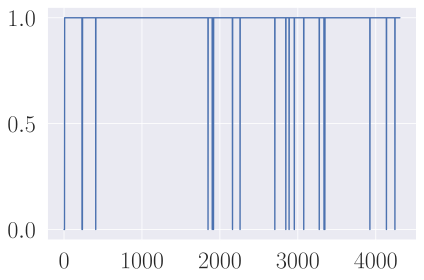

In [43]:
plt.plot(vol_class.jumps_test(rollingWindow= 5, sampling_param=1))

In [ ]:
x, y =vol_class.realised_skewness_kurtosis()

In [ ]:
y

In [ ]:
x =normalized_df.median(axis=0).replace([np.inf, -np.inf], 0).fillna(method="bfill")

In [161]:
bar_keys = ['tick', 'volume', 'calendar', 'dollar']
files_idx = 5
date_idx = files[files_idx].split(".")[0]
idx_file = os.path.join(rx_folder, files[files_idx])
tick_df = pd.read_pickle(idx_file)[date_idx]['tick']
volume_df = pd.read_pickle(idx_file)[date_idx]['volume']
calendar_df = pd.read_pickle(idx_file)[date_idx]['calendar']
dollar_df = pd.read_pickle(idx_file)[date_idx]['dollar']

#  convert all the below into one function that reads a dataframe and spits out all the data we need
# make sure it is unit tested
def produce_experiment_data(chosen_df):
    # function to produce dataframes for experiments
    # written in August 202
    # re-write it as part of the _init_ file
    chosen_df_micro = lobfut.apply_micro_structure_features(chosen_df)  # get micro structure df
    vol_class = lobfut.volatilityEstimation(chosen_df)  # get the vol class

    # features I need: micro_price changes / vols /skews /etc:
    experiment_df = chosen_df_micro.loc[:, ['micro_price', 'price_imbalance',
                                               'pct_change_micro_price', 'weighted_activity_spread',]]
    experiment_df['GK_vol'] = pd.Series(list(vol_class.garmanKlass(5))) # get a sample of Garman - Klass resampled for 5 clicks
    experiment_df['arrival_rates'] = pd.Series(
        vol_class.arrival_rates().reshape(vol_class.arrival_rates().shape[0], )).replace([np.inf, -np.inf], 0).fillna(0)
    X = experiment_df.pct_change_micro_price.replace([np.inf, -np.inf], 0).values.reshape(-1, 1)
    scaler = preprocessing.StandardScaler().fit(X)
    min_max_scaler = preprocessing.MinMaxScaler().fit(X)
    try:
        experiment_df['returns_normalised'] = scaler.transform(X) # use this format to get rid of the prior issues
        experiment_df['returns_mix_max'] = min_max_scaler.transform(X) # get both issues of 
        rs, rk = vol_class.realised_skewness_kurtosis()  # get skew/kurt

        experiment_df['skew'] = pd.Series(list(rs))
        experiment_df['kurt'] = pd.Series(list(rk))

        experiment_df['median_traded_volume'] = chosen_df_micro[['total_traded_volume_open',
                                                                    'total_traded_volume_high', 'total_traded_volume_low',
                                                                    'total_traded_volume_close']].quantile(0.5, axis=1)
        experiment_df['jumps_test'] = pd.Series(vol_class.jumps_test(rollingWindow=5, sampling_param=0))
        experiment_df['relz_var'] = pd.Series(vol_class.realised_variance( rollingWindow=5))
        experiment_df['trip_quart'] = pd.Series(vol_class.tripower_quarticity(rollingWindow=5, sampling_param=0))

        experiment_df = experiment_df.replace([np.inf, -np.inf], 0).fillna(0) # final clean up
    except ValueError:
        print("error")
        pass
    experiment_df = experiment_df.replace([np.inf, -np.inf], 0).fillna(0) # final clean up
    
    return experiment_df

In [152]:
chosen_df = volume_df
output_df = produce_experiment_data(chosen_df)
# there is a bug on dollar df to work out

Applying micro-structure features


/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [153]:
output_df.columns.values

array(['micro_price', 'price_imbalance', 'pct_change_micro_price',
       'weighted_activity_spread', 'GK_vol', 'arrival_rates',
       'returns_normalised', 'returns_mix_max', 'skew', 'kurt',
       'median_traded_volume', 'jumps_test', 'relz_var', 'trip_quart'],
      dtype=object)

In [154]:
output_df.head(5).T

,0,1,2,3,4
micro_price,158.370418,1.583704e+02,1.583704e+02,158.376171,158.385854
price_imbalance,-145.137624,-1.450332e+02,-1.449270e+02,-124.709698,27.046341
pct_change_micro_price,0.000000,2.082499e-08,2.115642e-08,0.000101,-0.000007
weighted_activity_spread,0.010000,1.000000e-02,1.000000e-02,0.010387,0.010000
GK_vol,0.000090,8.955168e-05,9.389273e-05,0.000100,0.000097
arrival_rates,1.000000,1.000000e+00,1.000000e+00,1.000000,2.000000
returns_normalised,0.000000,1.382652e-04,1.521740e-04,4.255489,-0.274158
returns_mix_max,0.000000,5.415881e-01,5.415887e-01,0.719457,0.530123
skew,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
kurt,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000


In [155]:
unit_test = output_df.pct_change_micro_price.values

In [156]:
import sklearn.preprocessing as preprocessing
X = output_df.pct_change_micro_price.values.reshape(-1, 1)

# normal 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print( X_scaled.mean(), X_scaled.std())

7.811274744695883e-18 1.0


In [157]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X_min_max_scaled = min_max_scaler.transform(X)
print( X_min_max_scaled.mean(), X_min_max_scaled.std())

0.541582348260156 0.0417985670666089


In [159]:
## fucked up unit test
files_idx = 5
for files_idx in range(0, 5):
    date_idx = files[files_idx].split(".")[0]
    idx_file = os.path.join(rx_folder, files[files_idx])
#     tick_df = pd.read_pickle(idx_file)[date_idx]['tick']
#     volume_df = pd.read_pickle(idx_file)[date_idx]['volume']
#     calendar_df = pd.read_pickle(idx_file)[date_idx]['calendar']
    dollar_df = pd.read_pickle(idx_file)[date_idx]['dollar']
    chosen_df = dollar_df
    output_df = produce_experiment_data(chosen_df)
    print(output_df.head(5).T)


Applying micro-structure features


/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


error
                                    0            1            2            3           4
micro_price                158.027273   158.026400   158.026154   158.024500  158.024737
price_imbalance             71.834545    44.252000    36.472308   -15.797500   -8.312105
pct_change_micro_price            NaN    -0.000006    -0.000002    -0.000010    0.000001
weighted_activity_spread     0.010000     0.010000     0.010000     0.010000    0.010000
GK_vol                       0.000000     0.000000     0.000000     0.000000    0.000000
arrival_rates                     NaN          NaN          NaN          NaN         NaN
returns_normalised                NaN    -0.002113     0.000494    -0.005364    0.002504
returns_mix_max                   NaN     0.967638     0.967642     0.967633    0.967645
skew                              NaN          NaN          NaN          NaN         NaN
kurt                              NaN          NaN          NaN          NaN         NaN
median_traded_v

/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


error
                                    0            1            2            3           4
micro_price                158.027273   158.026400   158.026154   158.024500  158.024737
price_imbalance             71.834545    44.252000    36.472308   -15.797500   -8.312105
pct_change_micro_price            NaN    -0.000006    -0.000002    -0.000010    0.000001
weighted_activity_spread     0.010000     0.010000     0.010000     0.010000    0.010000
GK_vol                       0.000000     0.000000     0.000000     0.000000    0.000000
arrival_rates                     NaN          NaN          NaN          NaN         NaN
returns_normalised                NaN    -0.002450     0.000330    -0.005916    0.002473
returns_mix_max                   NaN     0.976178     0.976181     0.976173    0.976184
skew                              NaN          NaN          NaN          NaN         NaN
kurt                              NaN          NaN          NaN          NaN         NaN
median_traded_v

/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ak/anaconda3/envs/newTimeSeries/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [182]:
import fathon
from fathon import fathonUtils as fu


In [ ]:
#%%
H, H_intercept = pydfb.fitFlucVec()

In [ ]:
plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)

In [ ]:
pymfdfa = fathon.MFDFA(b)

In [ ]:
winSizes = fu.linRangeByStep(5, 20)
qs = np.arange(-3, 4, 0.1)
revSeg = True
polOrd = 1
n, F = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)

In [ ]:
list_H, list_H_intercept = pymfdfa.fitFlucVec()

In [ ]:
plt.plot(np.log(n), np.log(F[0, :]), 'ro')
plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), '--', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n), np.log(F[half_idx, :]), 'co')
# plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
#          '--', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
plt.plot(np.log(n), np.log(F[-1, :]), 'yo')
plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), '--',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)

In [ ]:
list_H, list_H_intercept = pymfdfa.fitFlucVec()

In [ ]:
## replicating old malarkey below

In [ ]:
tick_standard = (tr - tr.mean()) / tr.std()
volume_standard = (vr - vr.mean()) / vr.std()
dollar_standard = (dr - dr.mean()) / dr.std()
calendar_standard = (cr - cr.mean()) / cr.std()

In [ ]:
fig, ax = plt.subplots()
#sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
# sns.kdeplot(tick_standard, 
#             ax=ax,
#             label="Tick", 
#             bw=0.25,
#             color='darkblue')
sns.kdeplot(volume_standard,
            ax=ax,
            label="Volume",
            bw=0.25,
            color='lightgreen')
sns.kdeplot(dollar_standard,
            ax=ax,
            label="Dollar",
            bw=0.25,
            linewidth=2,
            color='darkcyan')
sns.kdeplot(np.random.normal(size=len(tick_standard)),
            ax=ax,
            label="Normal",
            color='black',
            linewidth=2,
            linestyle="--")
plt.legend()

In [171]:
experimentsLocation = '/media/ak/T7/August11th2022Experiments/'
os.listdir(experimentsLocation)

['Returns',
 'ExperimentOne',
 'ExperimentTwo',
 'RX1_20180417_experiments_dict.pkl']

In [172]:
file_test = os.path.join(experimentsLocation, 'RX1_20180417_experiments_dict.pkl')

In [173]:
test_df = pd.read_pickle(file_test)

In [174]:
test_df['tick']

,micro_price,price_imbalance,pct_change_micro_price,weighted_activity_spread,GK_vol,arrival_rates,returns_normalised,returns_mix_max,skew,kurt,median_traded_volume
0,158.015858,7.080187,0.000000e+00,0.009719,0.000244,11.0,0.000000,0.000000,0.000000,0.000000e+00,21.5
1,158.005936,30.769679,3.387940e-05,0.010015,0.000239,3.0,0.130512,0.475278,0.000000,0.000000e+00,21.5
2,158.003346,-2.964549,-1.087981e-04,0.010882,0.000243,11.0,-0.427022,0.472204,0.000000,0.000000e+00,2.0
3,157.996859,8.255960,-4.173164e-05,0.008431,0.000244,7.0,-0.164950,0.473649,0.000000,0.000000e+00,10.5
4,157.988741,-21.923338,-3.062464e-05,0.010966,0.000236,3.0,-0.121547,0.473888,0.000000,0.000000e+00,10.5
...,...,...,...,...,...,...,...,...,...,...,...
19664,159.400114,-54.776033,-9.647936e-05,0.012604,0.000000,0.0,-0.378885,0.472469,0.000127,1.991445e-12,2.5
19665,159.396704,-83.286014,1.042914e-06,0.012040,0.000000,0.0,0.002198,0.474570,0.000127,2.006120e-12,6.5
19666,159.391852,-100.354815,-1.468696e-06,0.010000,0.000000,0.0,-0.007616,0.474516,0.000125,1.959923e-12,6.0
19667,159.397563,-104.475987,6.479827e-05,0.010826,0.000000,0.0,0.251332,0.475944,0.000125,1.952011e-12,3.0


In [175]:
test_df['volume']

,micro_price,price_imbalance,pct_change_micro_price,weighted_activity_spread,GK_vol,arrival_rates,returns_normalised,returns_mix_max,skew,kurt,median_traded_volume
0,158.027273,71.834545,0.000000,0.010000,0.000074,2.0,0.000000,0.000000,0.000000,0.000000e+00,1074.0
1,158.026400,44.252000,-0.000006,0.010000,0.000074,1.0,-0.078871,0.476383,0.000000,0.000000e+00,1074.0
2,158.026154,36.472308,-0.000002,0.010000,0.000074,4.0,-0.022576,0.476468,0.000000,0.000000e+00,1074.0
3,158.033212,51.915255,-0.000026,0.014654,0.000074,3.0,-0.373669,0.475935,0.000000,0.000000e+00,539.5
4,158.017368,-34.186374,-0.000115,0.009480,0.000062,2.0,-1.635709,0.474019,0.000000,0.000000e+00,7.5
...,...,...,...,...,...,...,...,...,...,...,...
289309,159.397983,-99.286933,0.000083,0.012859,0.000000,0.0,1.180963,0.478296,0.000310,1.193264e-11,7.0
289310,159.403008,-63.486822,-0.000008,0.010000,0.000000,0.0,-0.112687,0.476332,0.000303,1.155892e-11,4.0
289311,159.401886,-99.260841,-0.000006,0.010000,0.000000,0.0,-0.088319,0.476368,0.000302,1.150381e-11,4.0
289312,159.402349,-84.522107,0.000006,0.010000,0.000000,0.0,0.080380,0.476625,0.000301,1.143990e-11,2.5


In [176]:
test_df['calendar']

,micro_price,price_imbalance,pct_change_micro_price,weighted_activity_spread,GK_vol,arrival_rates,returns_normalised,returns_mix_max,skew,kurt,median_traded_volume,jumps_test,relz_var,trip_quart
0,157.996408,2.330148,0.000000,0.075281,0.000751,0.0,0.000000,0.000000,0.000000,0.000000e+00,539.5,0.0,0.0,0.0
1,157.890442,-76.799736,-0.000132,0.023617,0.000704,235.0,-0.109008,0.474611,0.000000,0.000000e+00,9.5,0.0,0.0,0.0
2,157.876021,-32.238018,-0.000081,0.012418,0.000730,300.0,-0.071617,0.475703,0.000000,0.000000e+00,1.0,0.0,0.0,0.0
3,157.832115,-6.735849,-0.000473,0.021300,0.000722,300.0,-0.362598,0.467209,0.000000,0.000000e+00,3.0,0.0,0.0,0.0
4,157.812447,-30.921523,0.000196,0.021849,0.000709,300.0,0.134113,0.481708,0.000000,0.000000e+00,12.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,159.412023,-9.306251,-0.000068,0.011085,0.000000,0.0,-0.061784,0.475990,0.000028,1.273193e-13,14.0,0.0,0.0,0.0
672,159.405305,9.732470,0.000015,0.010000,0.000000,0.0,-0.000016,0.477793,0.000029,1.277214e-13,2.0,0.0,0.0,0.0
673,159.404176,-47.618552,-0.000084,0.005735,0.000000,0.0,-0.073882,0.475636,0.000029,1.277765e-13,2.5,0.0,0.0,0.0
674,159.406551,-49.444677,0.000164,0.012648,0.000000,0.0,0.110900,0.481030,0.000031,1.593809e-13,2.0,0.0,0.0,0.0


In [178]:
test_df['tick'].columns.values

array(['micro_price', 'price_imbalance', 'pct_change_micro_price',
       'weighted_activity_spread', 'GK_vol', 'arrival_rates',
       'returns_normalised', 'returns_mix_max', 'skew', 'kurt',
       'median_traded_volume'], dtype=object)

In [180]:
returns_normalised_ticks = test_df['tick'].returns_normalised.values

In [183]:
x = returns_normalised_ticks

In [192]:
import fathon
from fathon import fathonUtils as fu
winSizes = fu.linRangeByStep(10, 20)
revSeg = True
polOrd = 3
print('This is fathon v{}'.format(fathon.__version__))


This is fathon v1.2


In [191]:
!pip install fathon --upgrade

In [193]:
def n_F(x):
    b_raw = np.asanyarray(x)
    b = fu.toAggregated(b_raw)
    pymdfa = fathon.MFDFA(x)
    n, F = pymdfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
    return n, F

In [194]:
n_F(x)

TypeError: computeFlucVec() takes at least 2 positional arguments (1 given)

In [ ]:

winSizes = fu.linRangeByStep(10, 2000)
qs = np.arange(-3, 4, 0.1)
revSeg = True
polOrd = 1

n, F = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)
